# Examen Unidad 2

**Integrantes**

Acosta López Roberto Ismael - 18111958 \
Gaytan Bañuelos Ángel - 18111893 \
Valenzuela Rodriguez Axel Alejandro - 18111978 

## Importando librerias

Importamos las librerias que utilizaremos para todo el documento

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split


# Librerias de prueba
# Para clasificación 
from sklearn.linear_model import LogisticRegression

#Evaluacion de rendimeinto 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Configuramos opciones de visualización 

In [192]:
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

## Cargando Dataset

### Información sobre el dataset
# Poner algo aqui 

lo que dice en kaggle es lo siguiente: 
Firma electrónica de préstamo basada en historial financiero
Desarrolle un modelo para predecir si el solicitante completó o no el proceso de firma electrónica

Contenido:-
El archivo contiene detalles de usuario que están dispuestos a completar el proceso de firma

Detalles:-
Excepto todas las columnas, la columna de clase denota lo siguiente: -
Clase 0 --> No completó el proceso de firma
clase 1 --> Proceso de firma electrónica completado.

Meta:-
El objetivo principal es crear varios algoritmos diferentes y predecir si el solicitante completó el proceso de firma electrónica o no.

Método de resolución: -
La declaración del problema dada se encuentra bajo clasificación binaria.
Tenemos que resolver el problema utilizando diferentes algoritmos de aprendizaje automático, así como algoritmos de aprendizaje profundo.

In [2]:
df = pd.read_csv('Financial-Data.csv')

## Capitulo 5 - Entendiendo los datos

### Verificar los datos

In [96]:
df.head()

,ID,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,...,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado,Firma_electronica
0,7629673,40,bi-weekly,1,3135,...,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,...,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,...,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,...,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,...,0.665523,0.744634,0.744634,12,0


### Preprocesamiento 

Viendo la información del dataset, vemos que contamos con una columna que maneja texto y solo se repiten unos cuantos datos, por lo que podriamos considerarla de tipo clasificación.

Lo que vamos a hacer con ella sera aplicar el método label encoder para almacenar los datos exclusivamente numericos en el dataframe

In [111]:
le = preprocessing.LabelEncoder()
le.fit(df['Fecha_de_salario'])
le.classes_

array([0, 1, 2, 3], dtype=int64)

In [112]:
datos_le = le.transform(df['Fecha_de_salario'])
df['Fecha_de_salario'] = datos_le
df.head()

,ID,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,...,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado,Firma_electronica
0,7629673,40,0,1,3135,...,0.515977,0.580918,0.380918,10,1
1,3560428,61,3,0,3180,...,0.826402,0.730720,0.630720,9,0
2,6934997,23,3,0,1540,...,0.762284,0.531712,0.531712,7,0
3,5682812,40,0,0,5230,...,0.778831,0.792552,0.592552,8,1
4,5335819,33,2,0,3590,...,0.665523,0.744634,0.744634,12,0


### Dimensionando los datos

In [4]:
df.shape

(17908, 21)

### Tipos de datos

In [113]:
df.dtypes

ID                           int64
Edad                         int64
Fecha_de_salario             int64
Dueño_de_casa                int64
Ingreso                      int64
                            ...   
risk_score_5               float64
ext_quality_score          float64
ext_quality_score_2        float64
consultas_el_mes_pasado      int64
Firma_electronica            int64
Length: 21, dtype: object

### Descripción estadística

In [114]:
df.describe()

,ID,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,...,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado,Firma_electronica
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,...,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.926290,0.425173,3657.214653,...,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,1.237135,0.494383,1504.890063,...,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,0.000000,905.000000,...,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,0.000000,2580.000000,...,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,0.000000,3260.000000,...,0.725113,0.625944,0.622973,6.000000,1.000000
75%,7.805624e+06,51.000000,2.000000,1.000000,4670.000000,...,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,3.000000,1.000000,9985.000000,...,0.996260,0.970249,0.966953,30.000000,1.000000


### Distribución de clases

In [7]:
conteo_df = df.groupby("Firma_electronica").size()
conteo_df

Firma_electronica
0    8269
1    9639
dtype: int64

1: Proceso de firma electrónica completado \
0: No completado el proceso de firma electrónica

### Correlación entre características

In [115]:
correlacion = df.corr(method="pearson")
correlacion

,ID,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,...,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado,Firma_electronica
ID,1.000000,0.004333,-0.013797,0.002528,-0.009034,...,0.004949,0.006025,0.006392,-0.003492,0.002735
Edad,0.004333,1.000000,-0.024346,0.142046,0.174062,...,0.093710,0.032265,0.040019,0.041224,-0.096998
Fecha_de_salario,-0.013797,-0.024346,1.000000,-0.013127,0.016259,...,0.170843,0.002412,-0.002812,-0.029082,0.017881
Dueño_de_casa,0.002528,0.142046,-0.013127,1.000000,0.147487,...,-0.080470,0.010080,0.005507,0.011215,-0.047409
Ingreso,-0.009034,0.174062,0.016259,0.147487,1.000000,...,0.025179,-0.008429,-0.003323,0.051622,0.031377
...,...,...,...,...,...,...,...,...,...,...,...
risk_score_5,0.004949,0.093710,0.170843,-0.080470,0.025179,...,1.000000,0.284291,0.279478,-0.015720,-0.007541
ext_quality_score,0.006025,0.032265,0.002412,0.010080,-0.008429,...,0.284291,1.000000,0.359777,-0.075221,-0.032129
ext_quality_score_2,0.006392,0.040019,-0.002812,0.005507,-0.003323,...,0.279478,0.359777,1.000000,-0.081526,-0.024271
consultas_el_mes_pasado,-0.003492,0.041224,-0.029082,0.011215,0.051622,...,-0.015720,-0.075221,-0.081526,1.000000,-0.025165


## Capitulo 6 - Visualizando los datos

### Histograma

In [116]:
def histograma():
    colores = ["red", "blue","orange", "green", "purple", "pink", "brown", "yellow", "cyan", "red", "blue","orange", "green", "purple", "pink", "brown", "yellow", "cyan", "red", "blue","orange", "green", "purple", "pink", "brown", "yellow", "cyan"]

    fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20,40))

    for i, ax in enumerate(axes.flat, start=0):
        ax.hist(x=df.iloc[:,i].values, histtype="stepfilled", color=colores[i], label= df.iloc[:,i].name, align="mid" )
        ax.set_title(df.iloc[:,i].name)
        ax.set_xlabel(df.iloc[:,i].name)
        ax.set_ylabel('Número de personas')
        ax.legend()

    plt.show()

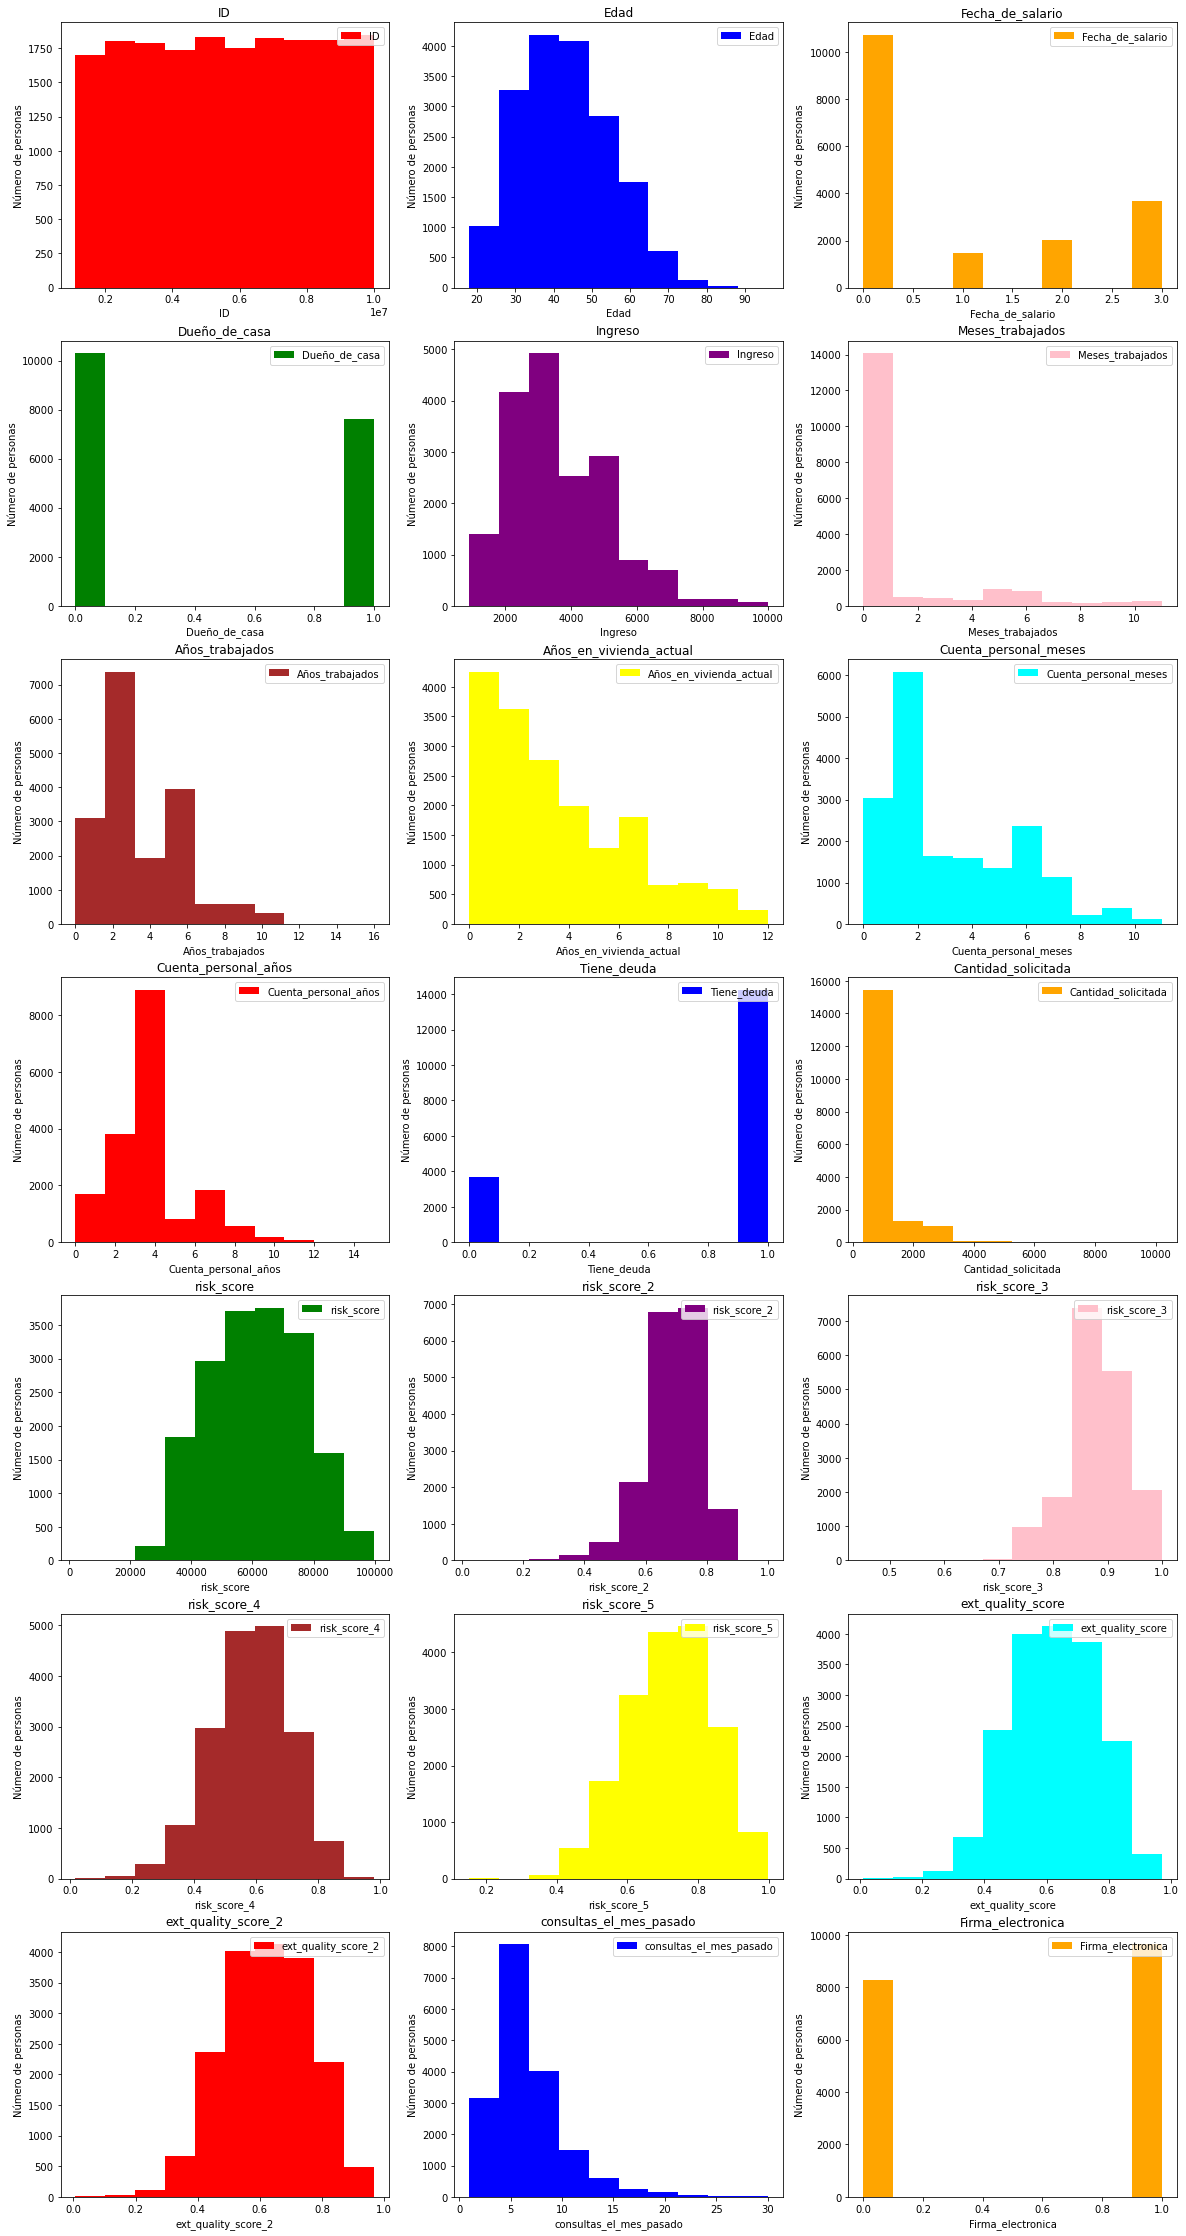

In [117]:
histograma()

### Diagramas de caja

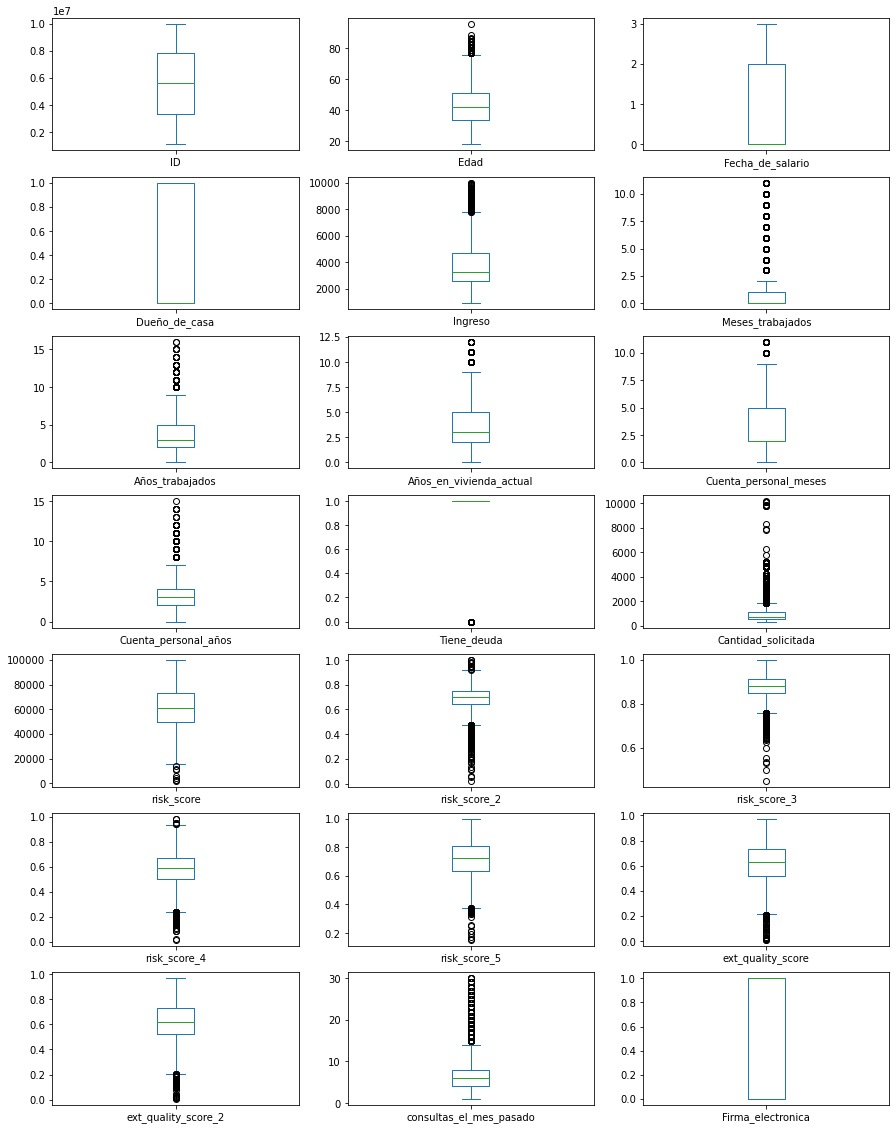

In [118]:
df.plot(kind="box", subplots=True, layout=(7,3), sharex=False, sharey=False, figsize=(15,20))
plt.show()

### Matriz de correlación 

<Figure size 144000x144000 with 0 Axes>

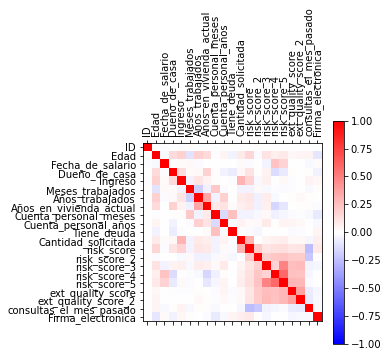

In [120]:
matriz_correlacion = df.corr(method='pearson')

plt.figure(figsize=(2000,2000))
plt.matshow(matriz_correlacion, cmap="bwr", vmin=-1, vmax=1)
plt.xticks(range(21),matriz_correlacion.columns, rotation=90)
plt.yticks(range(21),matriz_correlacion.columns)
plt.colorbar()
plt.show()

## Capitulo 8 - Seleccionando características

### Separación de los datos

In [164]:
# Datos de entrada o independientes
# Por el momento todas menos ID y  la firma electronica
X = df.iloc[:,1:-1]
X.head()

,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,Meses_trabajados,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado
0,40,0,1,3135,0,...,0.487712,0.515977,0.580918,0.380918,10
1,61,3,0,3180,0,...,0.713423,0.826402,0.730720,0.630720,9
2,23,3,0,1540,6,...,0.595018,0.762284,0.531712,0.531712,7
3,40,0,0,5230,0,...,0.767828,0.778831,0.792552,0.592552,8
4,33,2,0,3590,0,...,0.613487,0.665523,0.744634,0.744634,12


In [165]:
# Datos de salida o independientes
# Solamente la columna de firma electronica
y = df['Firma_electronica']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Firma_electronica, dtype: int64

### Método de filtro 

In [186]:
# Seleccionando características
# Se pueden cambiar el número de caracteristicas
# Extraccion de caracteristicas : chi-cuadrado
prueba = SelectKBest(score_func=chi2, k=5)
entrenamiento = prueba.fit(X.values, y.values)

# Puntaje de caracteristicas: chi- cuadrado
print("puntaje")
np.set_printoptions(precision=3)
print(entrenamiento.scores_)

puntaje
[5.521e+02 9.460e+00 2.314e+01 1.092e+04 8.928e+00 3.641e-01 1.361e+01
 1.692e+02 1.141e+01 5.628e+00 4.450e+04 5.150e+05 2.327e-02 8.528e-02
 1.815e-02 2.065e-02 5.792e-01 3.319e-01 2.369e+01]


In [187]:
# Caracteristicas seleccionadas
print("Caracteristicas seleccionadas")
caracteristicas = entrenamiento.transform(X.values)
print(caracteristicas[0:5,:])
caracteristicas_df = pd.DataFrame(data=caracteristicas, columns=list('ABCDE'))
caracteristicas_df.head()


Caracteristicas seleccionadas
[[4.000e+01 3.135e+03 6.000e+00 5.500e+02 3.620e+04]
 [6.100e+01 3.180e+03 2.000e+00 6.000e+02 3.015e+04]
 [2.300e+01 1.540e+03 7.000e+00 4.500e+02 3.455e+04]
 [4.000e+01 5.230e+03 2.000e+00 7.000e+02 4.215e+04]
 [3.300e+01 3.590e+03 2.000e+00 1.100e+03 5.385e+04]]


,A,B,C,D,E
0,40.0,3135.0,6.0,550.0,36200.0
1,61.0,3180.0,2.0,600.0,30150.0
2,23.0,1540.0,7.0,450.0,34550.0
3,40.0,5230.0,2.0,700.0,42150.0
4,33.0,3590.0,2.0,1100.0,53850.0


In [193]:
X.head()

,Edad,Fecha_de_salario,Dueño_de_casa,Ingreso,Meses_trabajados,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,consultas_el_mes_pasado
0,40,0,1,3135,0,...,0.487712,0.515977,0.580918,0.380918,10
1,61,3,0,3180,0,...,0.713423,0.826402,0.730720,0.630720,9
2,23,3,0,1540,6,...,0.595018,0.762284,0.531712,0.531712,7
3,40,0,0,5230,0,...,0.767828,0.778831,0.792552,0.592552,8
4,33,2,0,3590,0,...,0.613487,0.665523,0.744634,0.744634,12


Agrupando los datos en un dataframe para ver mejor la información, observamos que las columnas seleccionadas por el método de filtrado son las siguientes:

1. Edad
2. Ingreso
3. Cuenta_personal_meses
4. Cantidad_solicitada
5. risk_score

Por lo que solo preservaremos estas columnas en el dataframe de las variables independientes (X)

In [197]:
X = X[['Edad','Ingreso','Cuenta_personal_meses','Cantidad_solicitada','risk_score']]
X.head()

,Edad,Ingreso,Cuenta_personal_meses,Cantidad_solicitada,risk_score
0,40,3135,6,550,36200
1,61,3180,2,600,30150
2,23,1540,7,450,34550
3,40,5230,2,700,42150
4,33,3590,2,1100,53850


## Capitulo 7 - Procesamiento de los datos

### Estandarización de los datos

In [198]:
sc = StandardScaler()
X_estandar = sc.fit_transform(X)
X = pd.DataFrame(data = X_estandar, columns= X.columns )
X.head()

,Edad,Ingreso,Cuenta_personal_meses,Cantidad_solicitada,risk_score
0,-0.253977,-0.347022,1.160820,-0.573275,-1.616642
1,1.514775,-0.317118,-0.643926,-0.501696,-2.009657
2,-1.685824,-1.406929,1.612007,-0.716434,-1.723828
3,-0.253977,1.045146,-0.643926,-0.358537,-1.230123
4,-0.843561,-0.044665,-0.643926,0.214099,-0.470078


### Datos de entrenamiento y de prueba

In [207]:
# Separación de datos de entrenamiento y de prueba con 25% de ellos
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=0)

## Capitulo 9 - Algoritmos de clasificación ( todavia no es seguro usarlo )

###  Regresión lineal

In [208]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [209]:
print("Datos de entrenamiento")
print(y_test)
print()
print("Datos obtenidos en la predicción")
print(y_pred)

Datos de entrenamiento
[1 1 0 ... 0 0 1]

Datos obtenidos en la predicción
[1 1 1 ... 1 1 1]


## Capitulo 10 - Métricas de rendimiento algoritmos de clasificación  

### Regresion lineal

#### Matriz de confusión

In [211]:
matriz_confusion = confusion_matrix(y_test, y_pred)
print(matriz_confusion)


[[ 793 1287]
 [ 612 1785]]


#### Reporte de clasificación 



In [216]:
reporte_clasificacion = classification_report(y_test, y_pred)
print(reporte_clasificacion) 

              precision    recall  f1-score   support

           0       0.56      0.38      0.46      2080
           1       0.58      0.74      0.65      2397

    accuracy                           0.58      4477
   macro avg       0.57      0.56      0.55      4477
weighted avg       0.57      0.58      0.56      4477



#### Area bajo la curva

In [218]:
area_bajo_la_curva = roc_auc_score(y_test, y_pred)
print(area_bajo_la_curva)

0.5629654255319149
